# Desafio Indicium IMDB

**Arthur Silva Ferreira Coelho**

---

# Introdução

Variáveis

- Series_Title – Nome do filme
- Released_Year - Ano de lançamento
- Certificate - Classificação etária
- Runtime – Tempo de duração
- Genre - Gênero
- IMDB_Rating - Nota do IMDB
- Overview - Overview do filme
- Meta_score - Média ponderada de todas as críticas 
- Director – Diretor
- Star1 - Ator/atriz #1
- Star2 - Ator/atriz #2
- Star3 - Ator/atriz #3
- Star4 - Ator/atriz #4
- No_of_Votes - Número de votos
- Gross - Faturamento


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Importando o dataset

In [2]:
df = pd.read_csv('datasets/desafio_indicium_imdb.csv')
df.shape

(999, 16)

In [3]:
df.head(5)

,Unnamed: 0,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,1,The Godfather,1972,A,175 min,"Crime, Drama",9.2,An organized crime dynasty's aging patriarch t...,100.0,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,2,The Dark Knight,2008,UA,152 min,"Action, Crime, Drama",9.0,When the menace known as the Joker wreaks havo...,84.0,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,3,The Godfather: Part II,1974,A,202 min,"Crime, Drama",9.0,The early life and career of Vito Corleone in ...,90.0,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,4,12 Angry Men,1957,U,96 min,"Crime, Drama",9.0,A jury holdout attempts to prevent a miscarria...,96.0,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,5,The Lord of the Rings: The Return of the King,2003,U,201 min,"Action, Adventure, Drama",8.9,Gandalf and Aragorn lead the World of Men agai...,94.0,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


Como o dataset já é bem pequeno, não há necessidade de fazer um sample.

## Limpando o dataset

In [ ]:
df.dtypes, df.columns, df.dtypes.unique()

(Unnamed: 0         int64
 Series_Title      object
 Released_Year     object
 Certificate       object
 Runtime           object
 Genre             object
 IMDB_Rating      float64
 Overview          object
 Meta_score       float64
 Director          object
 Star1             object
 Star2             object
 Star3             object
 Star4             object
 No_of_Votes        int64
 Gross             object
 dtype: object,
 Index(['Unnamed: 0', 'Series_Title', 'Released_Year', 'Certificate', 'Runtime',
        'Genre', 'IMDB_Rating', 'Overview', 'Meta_score', 'Director', 'Star1',
        'Star2', 'Star3', 'Star4', 'No_of_Votes', 'Gross'],
       dtype='object'),
 array([dtype('int64'), dtype('O'), dtype('float64')], dtype=object))

Released_year, Runtime e Gross são variáveis numéricas, mas estão como objetos.

In [ ]:
df["Released_Year"].isnull().sum(),
df["Released_Year"].unique()

array(['1972', '2008', '1974', '1957', '2003', '1994', '1993', '2010',
       '1999', '2001', '1966', '2002', '1990', '1980', '1975', '2020',
       '2019', '2014', '1998', '1997', '1995', '1991', '1977', '1962',
       '1954', '1946', '2011', '2006', '2000', '1988', '1985', '1968',
       '1960', '1942', '1936', '1931', '2018', '2017', '2016', '2012',
       '2009', '2007', '1984', '1981', '1979', '1971', '1963', '1964',
       '1950', '1940', '2013', '2005', '2004', '1992', '1987', '1986',
       '1983', '1976', '1973', '1965', '1959', '1958', '1952', '1948',
       '1944', '1941', '1927', '1921', '2015', '1996', '1989', '1978',
       '1961', '1955', '1953', '1925', '1924', '1982', '1967', '1951',
       '1949', '1939', '1937', '1934', '1928', '1926', '1920', '1970',
       '1969', '1956', '1947', '1945', '1930', '1938', '1935', '1933',
       '1932', '1922', '1943', 'PG'], dtype=object)

Tem um ano "PG". provavelmente foi erro de digitação. não posso supor de que ano o filme é, por isso, vou remover esse dado da tabela.

In [ ]:
problematic_values = ['PG']
df = df[df['Released_Year'] != 'PG']

In [ ]:
df['Released_Year'] = df['Released_Year'].astype(int)
df['Runtime'] = df['Runtime'].str.replace(' min', '').astype(int)
df['Gross'] = df['Gross'].str.replace('$', '').str.replace(',', '').astype(float)
df.dtypes

Unnamed: 0         int64
Series_Title      object
Released_Year      int64
Certificate       object
Runtime            int64
Genre             object
IMDB_Rating      float64
Overview          object
Meta_score       float64
Director          object
Star1             object
Star2             object
Star3             object
Star4             object
No_of_Votes        int64
Gross            float64
dtype: object

In [ ]:
pd.set_option('display.float_format', lambda x: f"{x:,.0f}" if pd.notna(x) else "NaN")

Há uma coluna "Unnamed' que parece ser o index das linhas

In [ ]:
df = df.drop('Unnamed: 0', axis=1)

In [ ]:
df.head(5)

,Series_Title,Released_Year,Certificate,Runtime,Genre,IMDB_Rating,Overview,Meta_score,Director,Star1,Star2,Star3,Star4,No_of_Votes,Gross
0,The Godfather,1972,A,175,"Crime, Drama",9,An organized crime dynasty's aging patriarch t...,100,Francis Ford Coppola,Marlon Brando,Al Pacino,James Caan,Diane Keaton,1620367,"134,966,411"
1,The Dark Knight,2008,UA,152,"Action, Crime, Drama",9,When the menace known as the Joker wreaks havo...,84,Christopher Nolan,Christian Bale,Heath Ledger,Aaron Eckhart,Michael Caine,2303232,"534,858,444"
2,The Godfather: Part II,1974,A,202,"Crime, Drama",9,The early life and career of Vito Corleone in ...,90,Francis Ford Coppola,Al Pacino,Robert De Niro,Robert Duvall,Diane Keaton,1129952,"57,300,000"
3,12 Angry Men,1957,U,96,"Crime, Drama",9,A jury holdout attempts to prevent a miscarria...,96,Sidney Lumet,Henry Fonda,Lee J. Cobb,Martin Balsam,John Fiedler,689845,"4,360,000"
4,The Lord of the Rings: The Return of the King,2003,U,201,"Action, Adventure, Drama",9,Gandalf and Aragorn lead the World of Men agai...,94,Peter Jackson,Elijah Wood,Viggo Mortensen,Ian McKellen,Orlando Bloom,1642758,"377,845,905"


In [ ]:
df.shape

(998, 15)

Ótimo, de (999,16) foi para (998,15), o que significa que removemos com sucesso apenas aquela linha com 'PG' e agora temos dados numéricos com dtypes apropriados assim como a remoção da coluna Unnamed, que nçao tinha valor para nossa análise.

## Valores faltantes

In [ ]:
df.isnull().sum()

Series_Title       0
Released_Year      0
Certificate      101
Runtime            0
Genre              0
IMDB_Rating        0
Overview           0
Meta_score       157
Director           0
Star1              0
Star2              0
Star3              0
Star4              0
No_of_Votes        0
Gross            169
dtype: int64

In [ ]:
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
            'Valores faltantes': missing_data,
            'Porcentagem': missing_percent})
print(missing_df[missing_df['Valores faltantes'] > 0])

             Valores faltantes  Porcentagem
Certificate                101           10
Meta_score                 157           16
Gross                      169           17


A porcentagem de valores faltantes em 'meta_score' e 'certificate' é bem baixa. Quanto a 'gross', não posso presumir ou supor o faturamento de cada filme com essa informação faltante, por isso, vou dropar as linhas que possuem valores faltantes em qualqauer coluna.

In [ ]:
df = df.dropna()

In [ ]:
df.isnull().sum()

Series_Title     0
Released_Year    0
Certificate      0
Runtime          0
Genre            0
IMDB_Rating      0
Overview         0
Meta_score       0
Director         0
Star1            0
Star2            0
Star3            0
Star4            0
No_of_Votes      0
Gross            0
dtype: int64

Remover ou preencher (tratar) dados nulos é importante porque existem modelos que não permitem valores faltantes na hora do treinamento.

---

# Análise Exploratória

In [ ]:
df.describe()

,Released_Year,Runtime,IMDB_Rating,Meta_score,No_of_Votes,Gross
count,998,998,998,841,998,829
mean,"1,991",123,8,78,"271,624","67,955,004"
std,23,28,0,12,"321,074","109,812,283"
min,"1,920",45,8,28,"25,088","1,305"
25%,"1,976",103,8,70,"55,417","3,237,118"
50%,"1,999",119,8,79,"138,168","23,383,987"
75%,"2,009",137,8,87,"373,506","80,500,000"
max,"2,020",321,9,100,"2,303,232","936,662,225"


## Analisando a distribuição dos dados

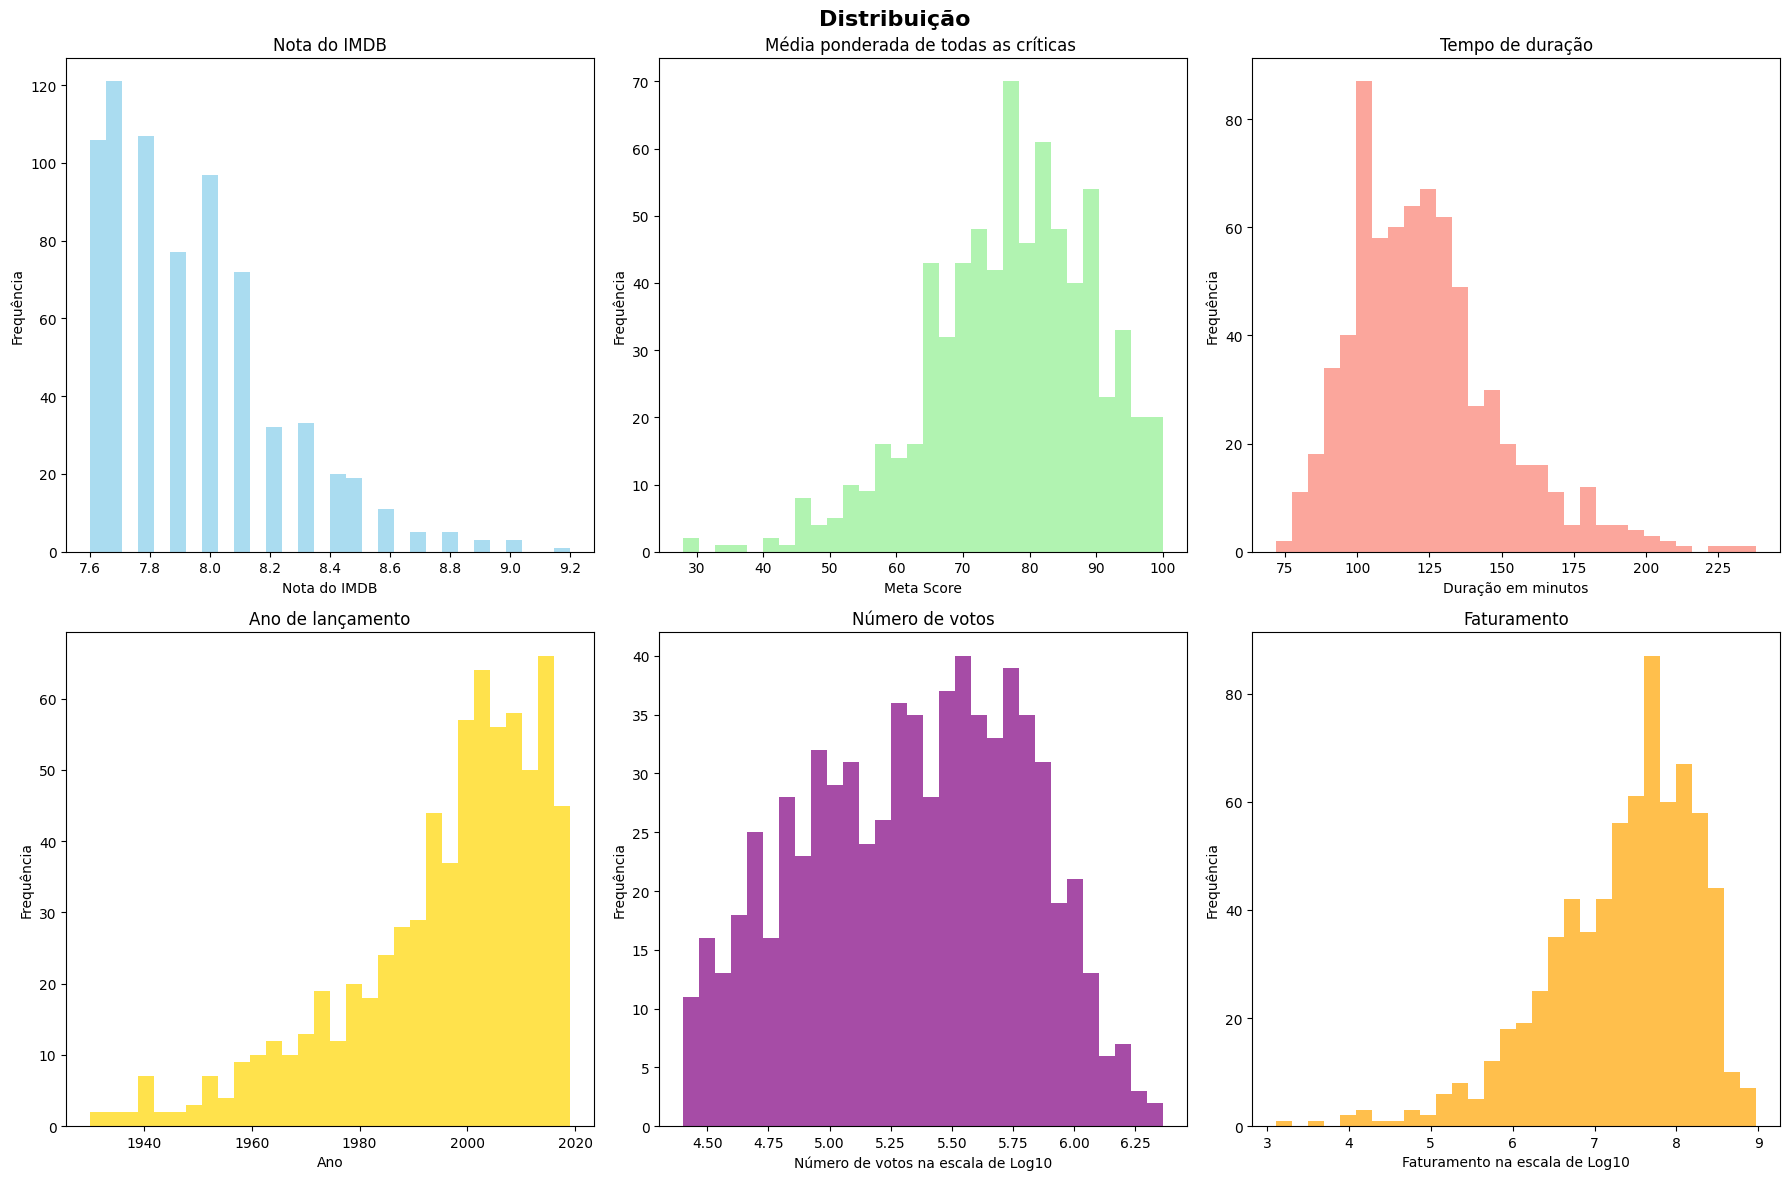

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribuição', fontsize=16, fontweight='bold')
        
# IMDB Rating distribution
axes[0, 0].hist(df['IMDB_Rating'].dropna(), bins=30, alpha=0.7, color='skyblue')
axes[0, 0].set_title('Nota do IMDB')
axes[0, 0].set_xlabel('Nota do IMDB')
axes[0, 0].set_ylabel('Frequência')

# Meta Score distribution
axes[0, 1].hist(df['Meta_score'].dropna(), bins=30, alpha=0.7, color='lightgreen')
axes[0, 1].set_title('Média ponderada de todas as críticas ')
axes[0, 1].set_xlabel('Meta Score')
axes[0, 1].set_ylabel('Frequência')

# Runtime distribution
axes[0, 2].hist(df['Runtime'].dropna(), bins=30, alpha=0.7, color='salmon')
axes[0, 2].set_title('Tempo de duração')
axes[0, 2].set_xlabel('Duração em minutos')
axes[0, 2].set_ylabel('Frequência')
        
# Released Year distribution
axes[1, 0].hist(df['Released_Year'].dropna(), bins=30, alpha=0.7, color='gold')
axes[1, 0].set_title('Ano de lançamento')
axes[1, 0].set_xlabel('Ano')
axes[1, 0].set_ylabel('Frequência')
        
# Number of Votes distribution (log scale)
axes[1, 1].hist(np.log10(df['No_of_Votes'].dropna()), bins=30, alpha=0.7, color='purple')
axes[1, 1].set_title('Número de votos')
axes[1, 1].set_xlabel('Número de votos na escala de Log10')
axes[1, 1].set_ylabel('Frequência')
        
# Gross distribution (log scale)
axes[1, 2].hist(np.log10(df['Gross'].dropna()), bins=30, alpha=0.7, color='orange')
axes[1, 2].set_title('Faturamento')
axes[1, 2].set_xlabel('Faturamento na escala de Log10')
axes[1, 2].set_ylabel('Frequência')
        
plt.tight_layout()
plt.show()

## Correlações

Vou agora analisar a correlação entre as variáveis numéricas

In [ ]:
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
print("As variáveis numéricas são: \n\n", numerical_columns)

As variáveis numéricas são: 

 Index(['Released_Year', 'Runtime', 'IMDB_Rating', 'Meta_score', 'No_of_Votes',
       'Gross'],
      dtype='object')


<Axes: >

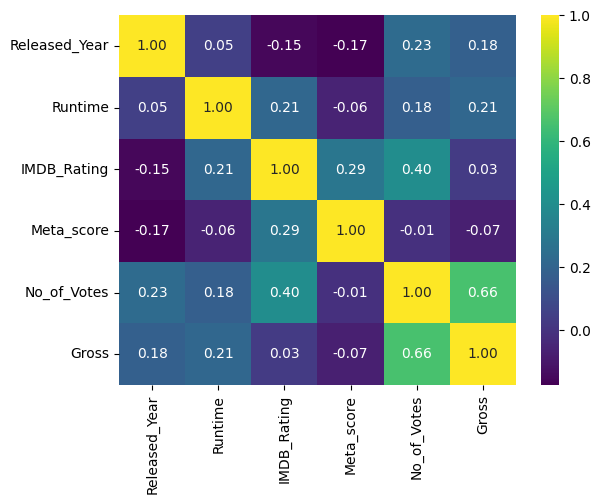

In [ ]:
corr = df.select_dtypes(include=['int64', 'float64']).corr(method='spearman', min_periods=1)
sns.heatmap(corr, annot=True, cmap='viridis', fmt='.2f')

In [ ]:
print("\nVariáveis com maior correlação (|r| > 0.5):")
for i in range(len(corr.columns)):
    for j in range(i+1, len(corr.columns)):
        if abs(corr.iloc[i, j]) > 0.5:
            print(f"{corr.columns[i]} vs {corr.columns[j]}: {corr.iloc[i, j]:.3f}")


Variáveis com maior correlação (|r| > 0.5):
No_of_Votes vs Gross: 0.658


## Top gêneros

In [ ]:
all_genres = []
for genres in df['Genre']:
    all_genres.extend([genre.strip() for genre in genres.split(',')])
        
genre_counts = pd.Series(all_genres).value_counts()

In [ ]:
genre_counts

Drama        498
Adventure    162
Comedy       161
Crime        142
Action       140
Thriller      99
Biography     88
Romance       88
Mystery       70
Animation     63
Sci-Fi        56
Fantasy       55
Family        43
History       37
War           29
Music         27
Horror        18
Sport         17
Western       16
Musical       11
Film-Noir      6
Name: count, dtype: int64

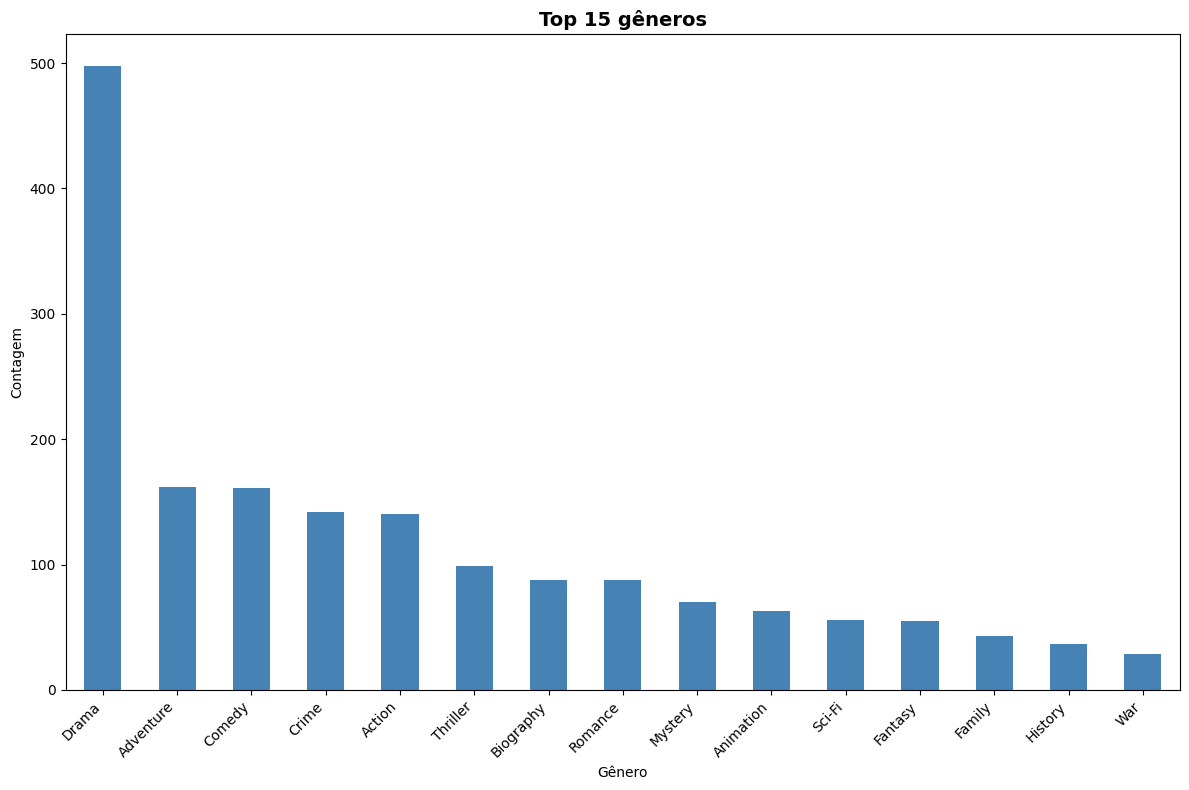

In [ ]:
plt.figure(figsize=(12, 8))
genre_counts.head(15).plot(kind='bar', color='steelblue')
plt.title('Top 15 gêneros', fontsize=14, fontweight='bold')
plt.xlabel('Gênero')
plt.ylabel('Contagem')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Gênero vs Nota do IMDB

Vou agrupar gênero pela média de votos

In [ ]:
genre_ratings = {}
for genre in genre_counts.head(10).index:
    mask = df['Genre'].str.contains(f'\\b{genre}\\b', na=False)
    genre_ratings[genre] = df[mask]['IMDB_Rating'].mean()

genre_rating_df = pd.DataFrame(list(genre_ratings.items()), 
                                     columns=['Genre', 'Average IMDB Rating'])
genre_rating_df = genre_rating_df.sort_values('Average IMDB Rating', ascending=False)

In [ ]:
print("Primeiros 5 gêneros:")
print(genre_counts.head(10).index.tolist())
print("\nPrimeiros 5 filmes com seus gêneros:")
print(df[['Series_Title', 'Genre', 'IMDB_Rating']].head())

# verificar um gênero específico
test_genre = genre_counts.head(10).index[0]  # Primeiro gênero
print(f"\nTestando gênero: {test_genre}")
mask = df['Genre'].str.contains(f'\\b{test_genre}\\b', na=False)
print(f"Filmes encontrados: {mask.sum()}")
print(f"Média de rating: {df[mask]['IMDB_Rating'].mean()}")
print(f"Ratings únicos: {df[mask]['IMDB_Rating'].unique()[:10]}")  # Primeiros 10 ratings únicos

Primeiros 5 gêneros:
['Drama', 'Adventure', 'Comedy', 'Crime', 'Action', 'Thriller', 'Biography', 'Romance', 'Mystery', 'Animation']

Primeiros 5 filmes com seus gêneros:
                                    Series_Title                     Genre  \
0                                  The Godfather              Crime, Drama   
1                                The Dark Knight      Action, Crime, Drama   
2                         The Godfather: Part II              Crime, Drama   
3                                   12 Angry Men              Crime, Drama   
4  The Lord of the Rings: The Return of the King  Action, Adventure, Drama   

   IMDB_Rating  
0            9  
1            9  
2            9  
3            9  
4            9  

Testando gênero: Drama
Filmes encontrados: 498
Média de rating: 7.939357429718875
Ratings únicos: [9.2 9.  8.9 8.8 8.7 8.6 8.5 8.4 8.3 8.2]


In [ ]:
for genre in genre_counts.head(10).index:
    mask = df['Genre'].str.contains(f'\\b{genre}\\b', na=False)
    avg_rating = df[mask]['IMDB_Rating'].mean()
    print(f"{genre}: {avg_rating:.4f}")

Drama: 7.9394
Adventure: 7.9654
Comedy: 7.8733
Crime: 7.9430
Action: 7.9371
Thriller: 7.9152
Biography: 7.9091
Romance: 7.9250
Mystery: 7.9471
Animation: 7.9270


In [ ]:
genre_rating_df

,Genre,Average IMDB Rating
1,Adventure,8
8,Mystery,8
3,Crime,8
0,Drama,8
4,Action,8
9,Animation,8
7,Romance,8
5,Thriller,8
6,Biography,8
2,Comedy,8


Achei que havia alguma coisa de errado porque todos os gêneros estavam sendo retornados com a média de 8, mas após verificar novamente, parece que todos os gêneros possuem avaliação média entre 7.87 e 7.96

Como a média de votos é praticamente a mesma para todos, não vou mais analisar pela média de votos mas sim pela quantidade total de votos por gênero.

In [ ]:
genre_total_votes = {}
for genre in genre_counts.head(10).index:
    mask = df['Genre'].str.contains(f'\\b{genre}\\b', na=False)
    genre_total_votes[genre] = df[mask]['No_of_Votes'].sum()  # Soma total de votos

genre_votes_df = pd.DataFrame(list(genre_total_votes.items()), 
                              columns=['Genre', 'Total Votes'])
genre_votes_df = genre_votes_df.sort_values('Total Votes', ascending=False)

In [ ]:
genre_votes_df

,Genre,Total Votes
0,Drama,156153620
1,Adventure,80760296
4,Action,73119766
3,Crime,54003235
2,Comedy,47940065
5,Thriller,38960254
8,Mystery,26958439
6,Biography,25804988
7,Romance,23162676
9,Animation,20331427


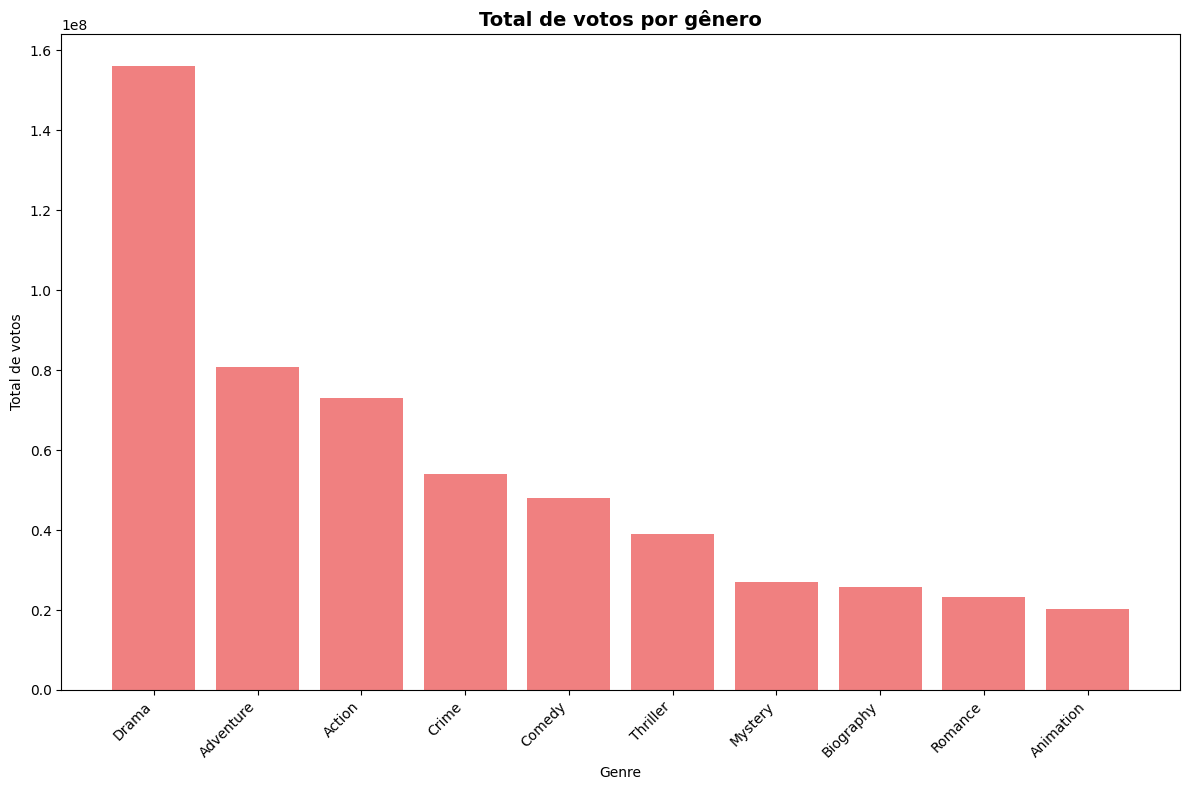

In [ ]:
plt.figure(figsize=(12, 8))
plt.bar(genre_votes_df['Genre'], genre_votes_df['Total Votes'], 
               color='lightcoral')
plt.title('Total de votos por gênero', fontsize=14, fontweight='bold')
plt.xlabel('Genre')
plt.ylabel('Total de votos')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

## Top 10 filmes com maior nota no IMDB

In [ ]:
pd.set_option('display.float_format', '{:.1f}'.format)
top_10_rated = df.nlargest(10, 'IMDB_Rating')[['Series_Title', 'Genre', 'IMDB_Rating', 'No_of_Votes']]

top_10_rated = top_10_rated.sort_values('No_of_Votes', ascending=False).reset_index(drop=True)
top_10_rated

,Series_Title,Genre,IMDB_Rating,No_of_Votes
0,The Dark Knight,"Action, Crime, Drama",9.0,2303232
1,Inception,"Action, Adventure, Sci-Fi",8.8,2067042
2,Fight Club,Drama,8.8,1854740
3,Pulp Fiction,"Crime, Drama",8.9,1826188
4,The Lord of the Rings: The Fellowship of the Ring,"Action, Adventure, Drama",8.8,1661481
5,The Lord of the Rings: The Return of the King,"Action, Adventure, Drama",8.9,1642758
6,The Godfather,"Crime, Drama",9.2,1620367
7,Schindler's List,"Biography, Drama, History",8.9,1213505
8,The Godfather: Part II,"Crime, Drama",9.0,1129952
9,12 Angry Men,"Crime, Drama",9.0,689845


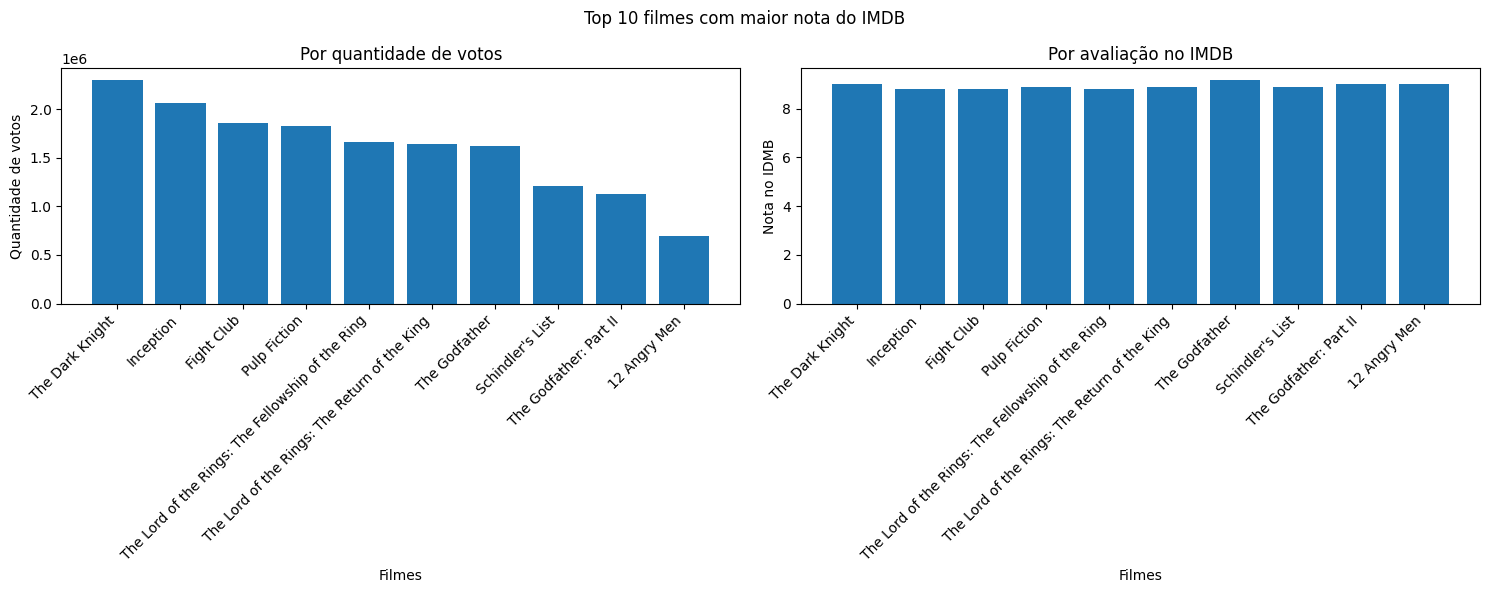

In [ ]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
fig.suptitle('Top 10 filmes com maior nota do IMDB')

ax1.bar(range(len(top_10_rated)), top_10_rated['No_of_Votes'])
ax1.set_title('Por quantidade de votos')
ax1.set_xlabel('Filmes')
ax1.set_ylabel('Quantidade de votos')
ax1.set_xticks(range(len(top_10_rated)))
ax1.set_xticklabels(top_10_rated['Series_Title'], rotation=45, ha='right')

ax2.bar(range(len(top_10_rated)), top_10_rated['IMDB_Rating'])
ax2.set_title('Por avaliação no IMDB')
ax2.set_xlabel('Filmes')
ax2.set_ylabel('Nota no IDMB')
ax2.set_xticks(range(len(top_10_rated)))
ax2.set_xticklabels(top_10_rated['Series_Title'], rotation=45, ha='right')

plt.tight_layout()
plt.show()

'The Dark Night' possui maior avaliação no IDMB e maior quantidade de votos. Já 'The Godfather' possui apenas maior avaliação no IDMB.

## Análise da variável 'Ano'

In [ ]:
year_rating = df.groupby('Released_Year')['IMDB_Rating'].mean()

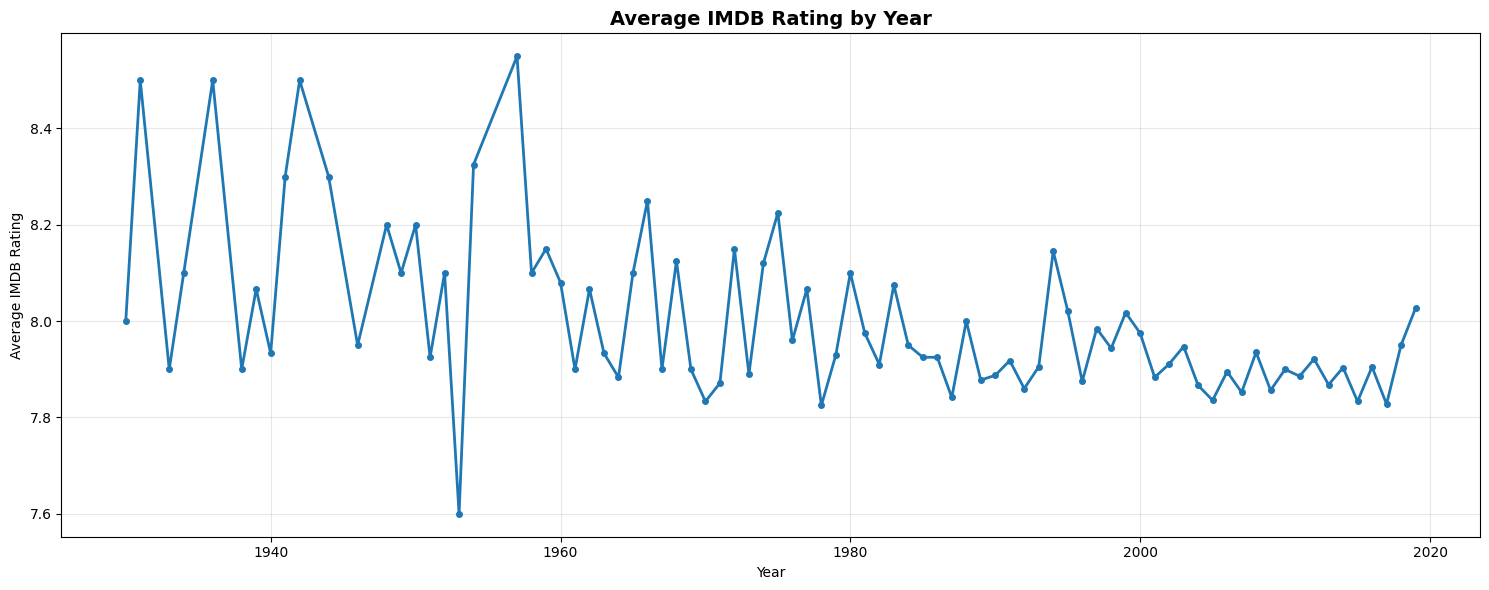

In [ ]:
plt.figure(figsize=(15, 6))
plt.plot(year_rating.index, year_rating.values, marker='o', linewidth=2, markersize=4)
plt.title('Average IMDB Rating by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Average IMDB Rating')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
movies_per_year = df['Released_Year'].value_counts().sort_index()

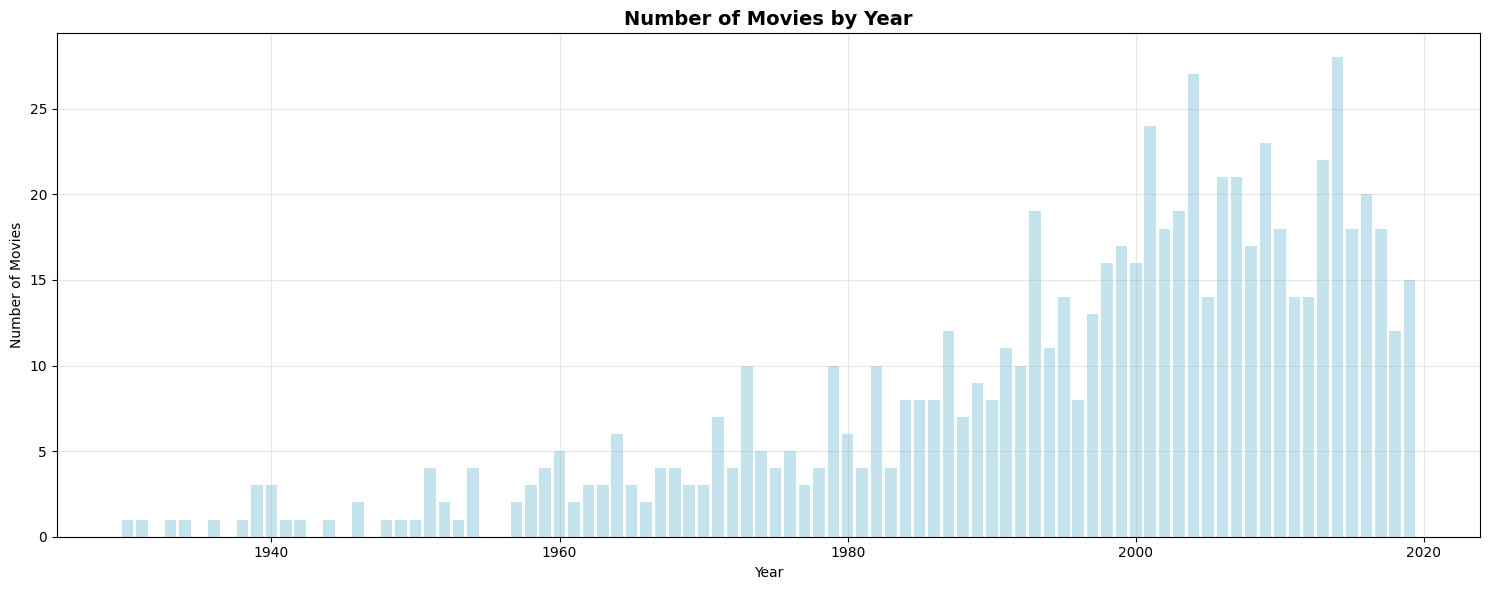

In [ ]:
plt.figure(figsize=(15, 6))
plt.bar(movies_per_year.index, movies_per_year.values, alpha=0.7, color='lightblue')
plt.title('Number of Movies by Year', fontsize=14, fontweight='bold')
plt.xlabel('Year')
plt.ylabel('Number of Movies')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

In [ ]:
print(f"\nAnos com maior média de notas do IMDB:")
print(year_rating.nlargest(5))
        



Anos com maior média de notas do IMDB:
Released_Year
1957   8.6
1931   8.5
1936   8.5
1942   8.5
1954   8.3
Name: IMDB_Rating, dtype: float64


In [ ]:
print(f"\nAnos com maior quantidade de filmes:")
print(movies_per_year.head())


Anos com maior quantidade de filmes:
Released_Year
1930    1
1931    1
1933    1
1934    1
1936    1
Name: count, dtype: int64


## Análise entre diretores e atores

In [ ]:
director_ratings = df.groupby('Director')['IMDB_Rating'].agg(['mean', 'count']).reset_index()
director_ratings = director_ratings[director_ratings['count'] >= 3]
director_ratings = director_ratings.sort_values('mean', ascending=False)

Achei que seria justo que, para essa análise, fosse levado em conta que o diretor deveria ter ao menos 3 filmes

In [ ]:
print("\nTop 10 diretores por média de notas do IMDB com o mínimo de 3 filmes:")
print(director_ratings.head(10))


Top 10 diretores por média de notas do IMDB com o mínimo de 3 filmes:
                 Director  mean  count
59      Christopher Nolan   8.5      8
100  Francis Ford Coppola   8.4      5
286         Peter Jackson   8.4      5
343       Stanley Kubrick   8.3      6
335          Sergio Leone   8.2      5
34           Billy Wilder   8.2      4
292     Quentin Tarantino   8.2      8
236       Martin Scorsese   8.2     10
39           Bong Joon Ho   8.2      3
14       Alfred Hitchcock   8.1      9


In [ ]:
star_columns = ['Star1', 'Star2', 'Star3', 'Star4']

In [ ]:
all_stars = []
for col in star_columns:
    all_stars.extend(df[col].dropna().tolist())
        
star_counts = pd.Series(all_stars).value_counts()
top_stars = star_counts[star_counts >= 3].index
top_stars

Index(['Robert De Niro', 'Al Pacino', 'Tom Hanks', 'Brad Pitt',
       'Clint Eastwood', 'Christian Bale', 'Leonardo DiCaprio', 'Matt Damon',
       'Ethan Hawke', 'Scarlett Johansson',
       ...
       'Charlton Heston', 'Elijah Wood', 'Arnold Schwarzenegger',
       'Humphrey Bogart', 'Robin Wright', 'Guy Pearce', 'Gene Wilder',
       'Ben Affleck', 'James Stewart', 'Woody Harrelson'],
      dtype='object', length=201)

In [ ]:
star_ratings = {}
for star in top_stars:
    mask = (df[star_columns] == star).any(axis=1)
    star_ratings[star] = df[mask]['IMDB_Rating'].mean()
        
star_rating_df = pd.DataFrame(list(star_ratings.items()), 
                                    columns=['Star', 'Average IMDB Rating'])
star_rating_df = star_rating_df.sort_values('Average IMDB Rating', ascending=False)
star_rating_df

,Star,Average IMDB Rating
192,Elijah Wood,8.8
90,Orlando Bloom,8.6
104,Mark Hamill,8.5
68,Marlon Brando,8.4
158,Lee J. Cobb,8.4
...,...,...
116,Jude Law,7.7
167,Danny Glover,7.7
61,Samantha Morton,7.7
113,Nicolas Cage,7.6


In [ ]:
print("\nTop 10 atores(as) por média de nota do IMDB com no mínimo 2 filmes:")
print(star_rating_df.head(10))


Top 10 atores(as) por média de nota do IMDB com no mínimo 2 filmes:
              Star  Average IMDB Rating
192    Elijah Wood                  8.8
90   Orlando Bloom                  8.6
104    Mark Hamill                  8.5
68   Marlon Brando                  8.4
158    Lee J. Cobb                  8.4
48    Diane Keaton                  8.3
170  Alec Guinness                  8.3
162     James Caan                  8.3
138  Robert Duvall                  8.3
41    Kevin Spacey                  8.3


## Análise de padrões de faturamento